## Analysis Section - Buffalo Recycles

First of all we are gonna get the final data set that was created on the **Data section**, how we obtanied the data and the final Data Frame is described on the following link <a href=https://github.com/DanSeb04/Data-Science/blob/master/BuffaloRecyclesProject/Data%20Section.ipynb>Data Section</a>. 

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
buff_df = pd.read_csv('https://query.data.world/s/cvtfgya4cauuuwosm32v75zoffl3dk')
buff_df.drop(columns='DATE', inplace=True)
buffG_df = buff_df.groupby(['NEIGHBORHOOD']).mean()
buffG_df.reset_index(inplace=True)
buffG_df.head()

,NEIGHBORHOOD,CURBSIDE RECYCLING (IN POUNDS),CURBSIDE GARBAGE (IN POUNDS),CURBSIDE RECYCLING RATE
0,ABBOTT McKINLEY,42.654167,215.357500,16.666667
1,ALBRIGHT,23.645000,88.204167,21.500000
2,ALLEN,22.292500,95.519167,18.833333
3,BABCOCK,19.578333,131.258333,13.000000
4,BLACK ROCK,34.943333,215.675833,13.833333


In [3]:
buffG_df['Latitude']=""
buffG_df['Longitude']=""
for ind, val in buffG_df['NEIGHBORHOOD'].items():
    try:
        address = val+',Buffalo, NY'
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        buffG_df['Latitude'][ind] = latitude
        buffG_df['Longitude'][ind]= longitude
    except Exception:
        pass
    
# For ABBOTT McKINLEY 
buffG_df['Latitude'][0]=42.847;buffG_df['Longitude'][0]=-78.824
# For BROADWAY FILLMORE
buffG_df['Latitude'][5]=42.89;buffG_df['Longitude'][5]=-78.83
# For COLD SPRING
buffG_df['Latitude'][8]=42.916;buffG_df['Longitude'][8]=-78.8575
# For GENESEE MOSELLE
buffG_df['Latitude'][17]=42.91;buffG_df['Longitude'][17]= -78.82
# For GRANT FERRY
buffG_df['Latitude'][18]=42.92;buffG_df['Longitude'][18]= -78.89
# For PARK MEADOW
buffG_df['Latitude'][36]=42.94;buffG_df['Longitude'][36]=  -78.87

#Deleting the columns
buffG_df.drop(index=11, inplace=True)
buffG_df.drop(index=30, inplace=True)

buffG_df.reset_index(inplace=True)
buffG_df.head()

,index,NEIGHBORHOOD,CURBSIDE RECYCLING (IN POUNDS),CURBSIDE GARBAGE (IN POUNDS),CURBSIDE RECYCLING RATE,Latitude,Longitude
0,0,ABBOTT McKINLEY,42.654167,215.357500,16.666667,42.847,-78.824
1,1,ALBRIGHT,23.645000,88.204167,21.500000,42.932,-78.8756
2,2,ALLEN,22.292500,95.519167,18.833333,42.8994,-78.8699
3,3,BABCOCK,19.578333,131.258333,13.000000,42.8736,-78.8321
4,4,BLACK ROCK,34.943333,215.675833,13.833333,42.9326,-78.9002


In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
LIMIT=100
radius = 500
buff_venues = getNearbyVenues(names=buffG_df['NEIGHBORHOOD'],
                                   latitudes=buffG_df['Latitude'],
                                   longitudes=buffG_df['Longitude']
                                  )
buff_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ABBOTT McKINLEY,42.847,-78.824,The Nine-Eleven Tavern,42.845277,-78.823668,Bar
1,ABBOTT McKINLEY,42.847,-78.824,7-Eleven,42.845152,-78.824053,Convenience Store
2,ABBOTT McKINLEY,42.847,-78.824,Family Dollar,42.846652,-78.823818,Discount Store
3,ABBOTT McKINLEY,42.847,-78.824,Mulroy Park,42.848282,-78.825299,Park
4,ABBOTT McKINLEY,42.847,-78.824,Molly's Pub,42.849712,-78.823871,Bar


### Analysis

Let's check the size of the data:

In [7]:
buff_venues.shape

(712, 7)

Now to see many venues were returned for each neighborhood:

In [10]:
buffGP_venues = buff_venues.groupby(['Neighborhood']).count()
buffGP_venues

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ABBOTT McKINLEY,8,8,8,8,8,8
ALBRIGHT,22,22,22,22,22,22
ALLEN,40,40,40,40,40,40
BABCOCK,5,5,5,5,5,5
BLACK ROCK,4,4,4,4,4,4
BROADWAY FILLMORE,2,2,2,2,2,2
BRYANT,20,20,20,20,20,20
CAZENOVIA PARK,5,5,5,5,5,5
COLD SPRING,6,6,6,6,6,6


Let's see now how many categories can we found on the venues in Buffalo:

In [11]:
print('There are {} uniques categories.'.format(len(buff_venues['Venue Category'].unique())))

There are 165 uniques categories.


### Analyzing Each Neighborhood

Let's apply one hot coding to know for every neighborhood which categories do they have:

In [12]:
# one hot encoding
buff_onehot = pd.get_dummies(buff_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
buff_onehot['Neighborhood'] = buff_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [buff_onehot.columns[-1]] + list(buff_onehot.columns[:-1])
buff_onehot = buff_onehot[fixed_columns]

buff_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,...,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,ABBOTT McKINLEY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABBOTT McKINLEY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ABBOTT McKINLEY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ABBOTT McKINLEY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ABBOTT McKINLEY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The new data frame size is:

In [13]:
buff_onehot.shape

(712, 166)

Next, let's group rows by neighborhood and normalize it by taking the mean of the frequency of occurrence of each category

In [15]:
buff_grouped = buff_onehot.groupby('Neighborhood').mean().reset_index()
buff_grouped

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,...,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,ABBOTT McKINLEY,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000
1,ALBRIGHT,0.000000,0.090909,0.045455,0.045455,0.000,0.090909,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000
2,ALLEN,0.000000,0.025000,0.000000,0.000000,0.000,0.000000,0.025000,0.000000,0.025000,...,0.000000,0.025,0.000000,0.025000,0.000000,0.025,0.000000,0.00,0.000000,0.000000
3,BABCOCK,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000
4,BLACK ROCK,0.000000,0.000000,0.000000,0.250000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000
5,BROADWAY FILLMORE,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000
6,BRYANT,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.05,0.000000,0.000000
7,CAZENOVIA PARK,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000
8,COLD SPRING,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000
9,COLUMBUS,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.000000


In [17]:
buff_grouped.shape

(50, 166)

Now let's create a new dataframe and display the top 4 venues for each neighborhood, since is the maximum number of venues for some of the neighborhoods:

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
import numpy as np

In [22]:
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = buff_grouped['Neighborhood']

for ind in np.arange(buff_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(buff_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,ABBOTT McKINLEY,Bar,Convenience Store,Pizza Place,Discount Store
1,ALBRIGHT,Garden,Intersection,American Restaurant,Athletics & Sports
2,ALLEN,Coffee Shop,Bar,Hotel,Gay Bar
3,BABCOCK,Home Service,Recreation Center,Deli / Bodega,Carpet Store
4,BLACK ROCK,Park,Art Museum,Martial Arts Dojo,Pizza Place


Now let's add the curbside recycling columns, sort the dataframe and organize the data:

In [40]:
Buffalo_df= neighborhoods_venues_sorted.merge(buffG_df, left_on='Neighborhood', right_on='NEIGHBORHOOD')
columns = ['index','NEIGHBORHOOD']
Buffalo_df.drop(columns, inplace=True, axis=1)  
Buffalo_df.sort_values(by=['CURBSIDE RECYCLING RATE'], inplace=True, ascending=True)
Buffalo_df.reset_index(inplace=True)
Buffalo_df.drop('index', inplace=True, axis=1)  
Buffalo_df

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,CURBSIDE RECYCLING (IN POUNDS),CURBSIDE GARBAGE (IN POUNDS),CURBSIDE RECYCLING RATE,Latitude,Longitude
0,EMERSON,Convenience Store,Bar,Duty-free Shop,French Restaurant,10.134167,94.118333,9.750000,42.9012,-78.8201
1,KENFIELD,Food Truck,Snack Place,Intersection,Campground,19.057500,155.580833,10.916667,42.9316,-78.8029
2,EMSLIE,Intersection,Gym / Fitness Center,Liquor Store,Zoo Exhibit,10.201667,81.834167,11.166667,42.8816,-78.8487
3,BROADWAY FILLMORE,Bowling Alley,Light Rail Station,Zoo Exhibit,Duty-free Shop,26.028333,207.462500,11.250000,42.89,-78.83
4,JOHNSON,Hotel,Coffee Shop,Bar,Steakhouse,4.553333,36.121667,11.250000,42.8926,-78.8788
5,SCHILLER PARK,Food,Bowling Alley,Park,Gym,36.906667,268.939167,12.083333,42.9131,-78.8049
6,LOVEJOY,Intersection,Deli / Bodega,Recreation Center,Pizza Place,36.294167,260.222500,12.416667,42.8898,-78.7996
7,KENSINGTON,Seafood Restaurant,Rental Service,Pizza Place,Dry Cleaner,41.187500,293.607500,12.416667,42.938,-78.8136
8,GENESEE MOSELLE,Intersection,Convenience Store,Deli / Bodega,Duty-free Shop,21.797500,158.609167,12.416667,42.91,-78.82
9,WILLERT PARK,Discount Store,Sandwich Place,Home Service,Convenience Store,13.288333,91.776667,12.583333,42.8881,-78.856


### Visualization

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's plot the most common venues for the 30 least recycling neighboorhods for the every most common venues:

In [129]:
VenuesC_df= Buffalo_df['1st Most Common Venue'][1:30]
VenuesC_df= VenuesC_df.append([Buffalo_df['2nd Most Common Venue'][1:30],Buffalo_df['3rd Most Common Venue'][1:30],Buffalo_df['4th Most Common Venue'][1:30]], ignore_index=True)
VenuesC_df = pd.DataFrame(VenuesC_df)
VenuesC_df.head()

,0
0,Food Truck
1,Intersection
2,Bowling Alley
3,Hotel
4,Food


In [132]:
VenuesC_df.rename(columns={0:'Most Common Venues'}, inplace=True)
VenuesC_df.head()

,Most Common Venues
0,Food Truck
1,Intersection
2,Bowling Alley
3,Hotel
4,Food


In [133]:
VenuesC_df.shape

(116, 1)

Let's have a plot for the venues which appear more than one time:

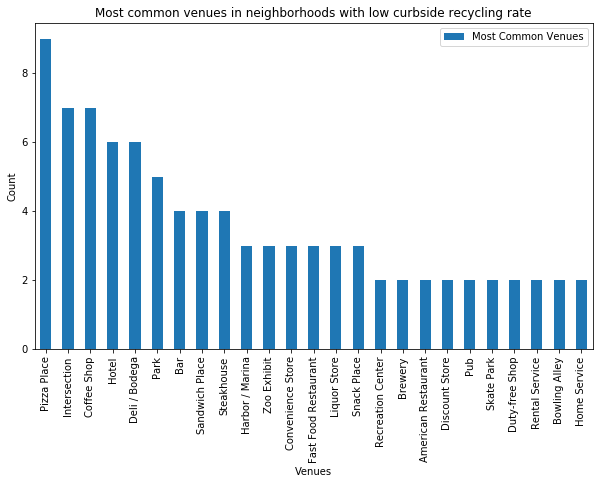

In [136]:
venuescount_df= pd.DataFrame(VenuesC_df['Most Common Venues'].value_counts())
venuescount_df[0:25].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Most common venues in neighborhoods with low curbside recycling rate') 

plt.show()

Now let's compare with the neighborhood which has the greatest ratings in recycling:

In [143]:
VenuesC2_df= Buffalo_df['1st Most Common Venue'][31:len(Buffalo_df['1st Most Common Venue'])]
VenuesC2_df= VenuesC2_df.append([Buffalo_df['2nd Most Common Venue'][31:len(Buffalo_df['1st Most Common Venue'])],Buffalo_df['3rd Most Common Venue'][31:len(Buffalo_df['1st Most Common Venue'])],Buffalo_df['4th Most Common Venue'][31:len(Buffalo_df['1st Most Common Venue'])]], ignore_index=True)
VenuesC2_df = pd.DataFrame(VenuesC2_df)
VenuesC2_df.head()

,0
0,Convenience Store
1,Bar
2,Hockey Arena
3,Trail
4,Hot Dog Joint


In [145]:
VenuesC2_df.rename(columns={0:'Most Common Venues'}, inplace=True)
VenuesC2_df.head()

,Most Common Venues
0,Convenience Store
1,Bar
2,Hockey Arena
3,Trail
4,Hot Dog Joint


In [147]:
VenuesC2_df.shape

(76, 1)

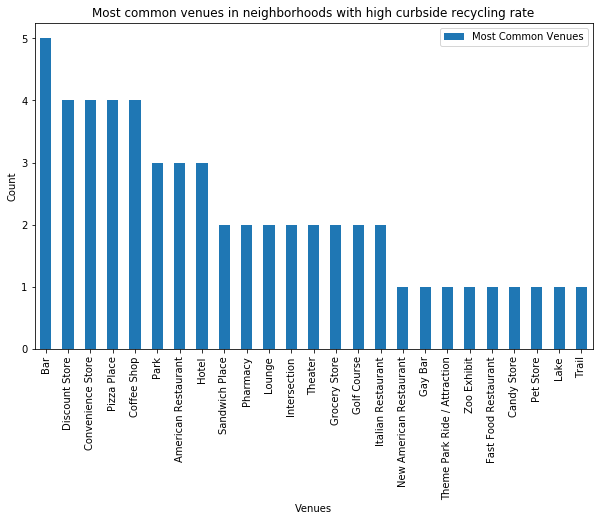

In [149]:
venuescount2_df= pd.DataFrame(VenuesC2_df['Most Common Venues'].value_counts())
venuescount2_df[0:25].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Most common venues in neighborhoods with high curbside recycling rate') 

plt.show()

## Clustering Neighborhoods

We can try to clusters neighborhood in order to better address analysis. Instead of having a lot of neighborhoods we can have 5 clusters, which means similar neighborhoods and then address also the strategies to them and not to search a unique strategy for every neighborhood beacuse that can be innefficient or a general one which may not work for some of the neighborhoods.

In [150]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         868 KB

The following NEW packages will be INSTALLED:

    altair:  3.2.0-py36_0 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge


altair-3.2.0         | 770 KB    | #################################

In [152]:
from sklearn.cluster import KMeans

In [154]:
kclusters = 5

Buffalo_grouped_clustering = buff_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Buffalo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 0, 4, 2, 4, 0, 4, 0, 0], dtype=int32)

In [155]:
# add clustering labels
Buffalo_df.insert(0, 'Cluster Labels', kmeans.labels_)
Buffalo_df.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,CURBSIDE RECYCLING (IN POUNDS),CURBSIDE GARBAGE (IN POUNDS),CURBSIDE RECYCLING RATE,Latitude,Longitude
0,0,EMERSON,Convenience Store,Bar,Duty-free Shop,French Restaurant,10.134167,94.118333,9.750000,42.9012,-78.8201
1,4,KENFIELD,Food Truck,Snack Place,Intersection,Campground,19.057500,155.580833,10.916667,42.9316,-78.8029
2,0,EMSLIE,Intersection,Gym / Fitness Center,Liquor Store,Zoo Exhibit,10.201667,81.834167,11.166667,42.8816,-78.8487
3,4,BROADWAY FILLMORE,Bowling Alley,Light Rail Station,Zoo Exhibit,Duty-free Shop,26.028333,207.462500,11.250000,42.89,-78.83
4,2,JOHNSON,Hotel,Coffee Shop,Bar,Steakhouse,4.553333,36.121667,11.250000,42.8926,-78.8788


Let's now visualize the results

In [159]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [235]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Buffalo_df['Latitude'], Buffalo_df['Longitude'], Buffalo_df['Neighborhood'], Buffalo_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**If you want to see the map you should copy the GitHub Url to the followind Jupyter Notebooks rendering page:** https://nbviewer.jupyter.org/

## Examine the clusters

### Cluster 0

In [185]:
clust0= Buffalo_df.loc[Buffalo_df['Cluster Labels'] == 0, Buffalo_df.columns[[1]+[2]+[8]+[9]+[10]]]
clust0.head()

,Neighborhood,1st Most Common Venue,CURBSIDE RECYCLING RATE,Latitude,Longitude
0,EMERSON,Convenience Store,9.750000,42.9012,-78.8201
2,EMSLIE,Intersection,11.166667,42.8816,-78.8487
6,LOVEJOY,Intersection,12.416667,42.8898,-78.7996
8,GENESEE MOSELLE,Intersection,12.416667,42.91,-78.82
9,WILLERT PARK,Discount Store,12.583333,42.8881,-78.856


In [218]:
clust0_mean=clust0['CURBSIDE RECYCLING RATE'].mean()
clust0_comm= pd.DataFrame(clust0['1st Most Common Venue'].value_counts())
clust0_comm=clust0_comm.index[0]

In [219]:
print(clust0_mean,clust0_comm)

15.58974358974359 Coffee Shop


### Cluster 1

In [220]:
clust1= Buffalo_df.loc[Buffalo_df['Cluster Labels'] == 1, Buffalo_df.columns[[1]+[2]+[8]+[9]+[10]]]
clust1.head()

,Neighborhood,1st Most Common Venue,CURBSIDE RECYCLING RATE,Latitude,Longitude
11,KINGSLEY,Coffee Shop,12.75,42.8867,-78.8784


In [222]:
clust1_mean=clust1['CURBSIDE RECYCLING RATE'].mean()
clust1_comm= pd.DataFrame(clust1['1st Most Common Venue'].value_counts())
clust1_comm=clust1_comm.index[0]

In [223]:
print(clust1_mean,clust1_comm)

12.75 Coffee Shop


### Cluster 2

In [224]:
clust2= Buffalo_df.loc[Buffalo_df['Cluster Labels'] == 2, Buffalo_df.columns[[1]+[2]+[8]+[9]+[10]]]
clust2.head()

,Neighborhood,1st Most Common Venue,CURBSIDE RECYCLING RATE,Latitude,Longitude
4,JOHNSON,Hotel,11.250000,42.8926,-78.8788
13,BABCOCK,Home Service,13.000000,42.8736,-78.8321
15,LaSALLE,Nightclub,13.250000,42.9457,-78.8242
25,FIRST WARD,Brewery,14.833333,42.8669,-78.8636
29,LAKEVIEW,Park,15.666667,42.8996,-78.8955


In [225]:
clust2_mean=clust2['CURBSIDE RECYCLING RATE'].mean()
clust2_comm= pd.DataFrame(clust2['1st Most Common Venue'].value_counts())
clust2_comm=clust2_comm.index[0]

In [226]:
print(clust2_mean,clust2_comm)

14.347222222222221 Park


### Cluster 3

In [228]:
clust3= Buffalo_df.loc[Buffalo_df['Cluster Labels'] == 3, Buffalo_df.columns[[1]+[2]+[8]+[9]+[10]]]
clust3.head()

,Neighborhood,1st Most Common Venue,CURBSIDE RECYCLING RATE,Latitude,Longitude
45,DELAWARE PARK,Sandwich Place,19.25,42.9348,-78.86


In [229]:
clust3_mean=clust3['CURBSIDE RECYCLING RATE'].mean()
clust3_comm= pd.DataFrame(clust3['1st Most Common Venue'].value_counts())
clust3_comm=clust3_comm.index[0]

In [230]:
print(clust3_mean,clust3_comm)

19.25 Sandwich Place


### Cluster 4

In [231]:
clust4= Buffalo_df.loc[Buffalo_df['Cluster Labels'] == 4, Buffalo_df.columns[[1]+[2]+[8]+[9]+[10]]]
clust4.head()

,Neighborhood,1st Most Common Venue,CURBSIDE RECYCLING RATE,Latitude,Longitude
1,KENFIELD,Food Truck,10.916667,42.9316,-78.8029
3,BROADWAY FILLMORE,Bowling Alley,11.250000,42.89,-78.83
5,SCHILLER PARK,Food,12.083333,42.9131,-78.8049
7,KENSINGTON,Seafood Restaurant,12.416667,42.938,-78.8136
12,PERRY,Pub,12.833333,42.8723,-78.8561


In [232]:
clust4_mean=clust4['CURBSIDE RECYCLING RATE'].mean()
clust4_comm= pd.DataFrame(clust4['1st Most Common Venue'].value_counts())
clust4_comm=clust4_comm.index[0]

In [233]:
print(clust4_mean,clust4_comm)

14.203125 Snack Place


### Clusters Table

In [234]:
Report = [
            {'Cluster':'0', 'Curbside Reclycling Rate Mean':clust0_mean,'Most Common Venue':clust0_comm},
            {'Cluster':'1', 'Curbside Reclycling Rate Mean':clust1_mean,'Most Common Venue':clust1_comm},
            {'Cluster':'2', 'Curbside Reclycling Rate Mean':clust2_mean,'Most Common Venue':clust2_comm},
            {'Cluster':'3', 'Curbside Reclycling Rate Mean':clust3_mean,'Most Common Venue':clust3_comm},
            {'Cluster':'4', 'Curbside Reclycling Rate Mean':clust4_mean,'Most Common Venue':clust4_comm}
         ] 
Report = pd.DataFrame(Report)
Report.style.hide_index()

Cluster,Curbside Reclycling Rate Mean,Most Common Venue
0,15.5897,Coffee Shop
1,12.75,Coffee Shop
2,14.3472,Park
3,19.25,Sandwich Place
4,14.2031,Snack Place


#### This is the end of the analysis and results, thank you for reaching this far, if you notice something wrong or something you don't undestand dont hesitate to contact me I will be thrilled to receive improves or to help you.